In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
outputdir = os.path.expanduser("~/data/plots_of_the_day/lpl/fig_learning_rule")
os.makedirs(outputdir, exist_ok=True)

## Full Latent Predictive Learning (LPL) rule as a function of postsynaptic activity that co-varies with a single input

This section provides simple visualizations of the Latent Predictive Learning (LPL) rule

### Phenomenological nonlinear activation function 

Rajan, K., Abbott, L. F., & Sompolinsky, H. (2010). Stimulus-dependent suppression of chaos in recurrent neural networks. Physical review e, 82(1), 011903.

In [3]:
rmax = 80
r0 = 2

def activation(h):
    z = np.zeros_like(h)
    z[h<0] = r0 * np.tanh(h[h<0]/r0)
    z[h>=0] = (rmax-r0) * np.tanh(h[h>=0]/(rmax-r0))
    return z

def derivative(h):
    sech_subthres = 1/np.cosh(h/r0)
    sech = 1/np.cosh(h/(rmax-r0))
    
    der = np.zeros_like(h)
    
    der[h<0] = sech_subthres[h<0]**2
    der[h>=0] = sech[h>=0]**2
    
    return der

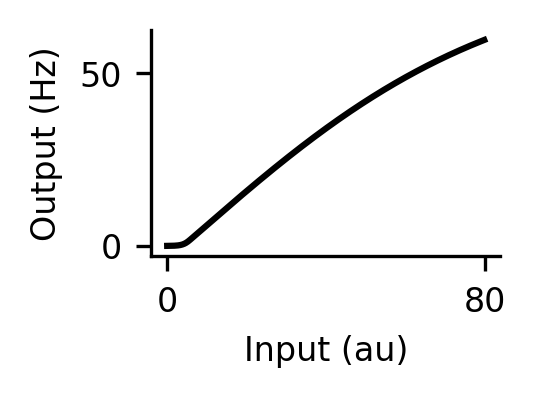

In [4]:
h = np.arange(0, 80, 0.1)
z = activation(h-3*r0)+r0

plt.figure(figsize=(1.5,1.0), dpi=300)
plt.plot(h, z, color='k')
plt.xlabel('Input (au)', fontsize=8)
plt.ylabel('Output (Hz)', fontsize=8)
plt.xticks([0, 80])
plt.yticks([0, 50])
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)

sns.despine()

plt.savefig(os.path.join(outputdir,'fI_activation.pdf'), bbox_inches='tight')

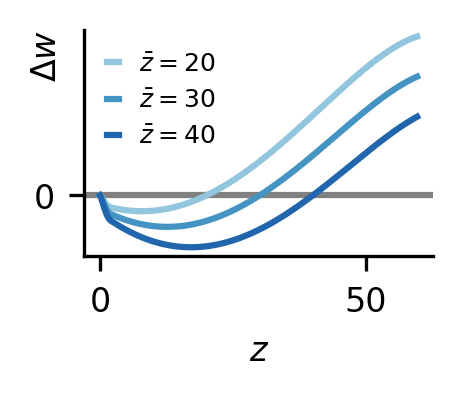

In [5]:
h = np.arange(0, 80, 0.1) # Neuron inputs
z_bars = [20, 30, 40]
colors = ['#92C5DE', '#4393C3', '#2166AC']

var = 1
eta = 1e-3

z = activation(h-3*r0)+r0 # Neuron activity
der = derivative(h-3*r0) # Derivative of the activation function

plt.figure(figsize=(1.5,1.0), dpi=300)

for i, z_bar in enumerate(z_bars):
    plt.plot(z, eta*h*der*1/var*(z-z_bar), label=r'$\bar z={}$'.format(z_bar), color=colors[i])
    
plt.xlabel(r'$z$', fontsize=8)
plt.ylabel(r'$\Delta w$', fontsize=8, loc='top')
plt.axhline(0, color='gray', zorder=0)
plt.yticks([0])
plt.ylim(-0.55, 1.5)
plt.xticks([0, 50])
ax = plt.gca()
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.labelpad = -7
plt.legend(frameon=False, fontsize=6, handlelength=0.5)

sns.despine()

plt.savefig(os.path.join(outputdir,'fI_learning_rule_mean.pdf'), bbox_inches='tight')

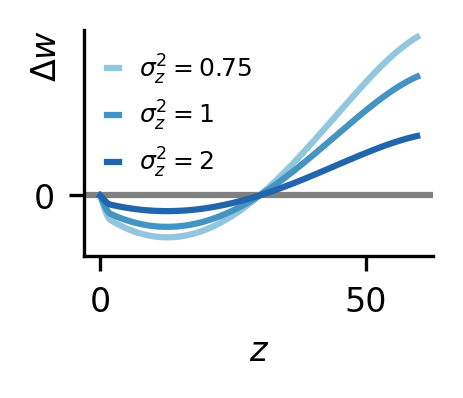

In [6]:
h = np.arange(0, 80, 0.1)
variances = [0.75, 1, 2]
z_bar = 30
eta = 1e-3

z = activation(h-3*r0)+r0
der = derivative(h-3*r0)

plt.figure(figsize=(1.5,1.0), dpi=300)

for i, var in enumerate(variances):
    plt.plot(z, eta*h*der*1/var*(z-z_bar), label=r'$\sigma_z^2={}$'.format(var), color=colors[i])
    
plt.xlabel(r'$z$', fontsize=8)
plt.ylabel(r'$\Delta w$', fontsize=8, loc='top')
plt.axhline(0, color='gray', zorder=0)
plt.yticks([0])
plt.ylim(-0.55, 1.5)
plt.xticks([0, 50])
ax = plt.gca()
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.labelpad = -7
plt.legend(frameon=False, fontsize=6, handlelength=0.5)

sns.despine()

plt.savefig(os.path.join(outputdir,'fI_learning_rule_var.pdf'), bbox_inches='tight')

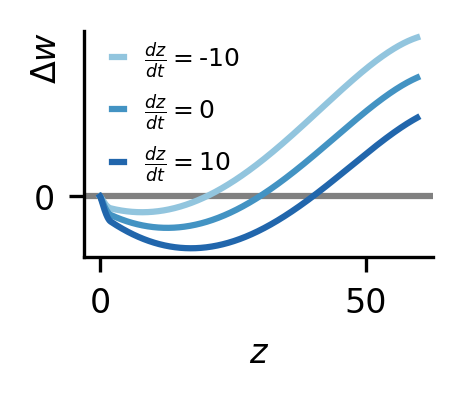

In [7]:
h = np.arange(0, 80, 0.1)
dzdts = [-10, 0, 10]
var = 1
z_bar = 30
eta = 1e-3

z = activation(h-3*r0)+r0
der = derivative(h-3*r0)

plt.figure(figsize=(1.5,1.0), dpi=300)

for i, dzdt in enumerate(dzdts):
    plt.plot(z, eta*h*der*(1/var*(z-z_bar)-dzdt), label=r'$\frac{dz}{dt}=$'+str(dzdt), color=colors[i])
    
plt.xlabel(r'$z$', fontsize=8)
plt.ylabel(r'$\Delta w$', fontsize=8, loc='top')
plt.axhline(0, color='gray', zorder=0)
plt.yticks([0])
plt.ylim(-0.55, 1.5)
plt.xticks([0, 50])
ax = plt.gca()
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.labelpad = -7
plt.legend(frameon=False, fontsize=6, handlelength=0.5, loc=(0.05,0.28))

sns.despine()

plt.savefig(os.path.join(outputdir,'fI_learning_rule_rate.pdf'), bbox_inches='tight')

[Text(0, 0, '3'), Text(0, 25, '2'), Text(0, 49, '1')]

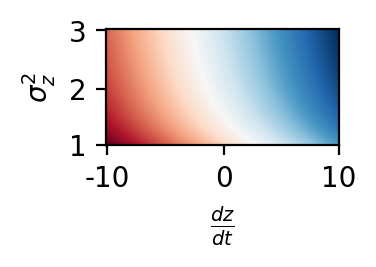

In [8]:
h = np.array([45.])

dzdt_range = np.linspace(-10, 10, 99)
variance_range = np.linspace(1, 3, 49)
dzdt, var = np.meshgrid(dzdt_range, variance_range)

z_bar = 30
eta = 1e-3

z = activation(h-3*r0)+r0
der = derivative(h-3*r0)

plt.figure(figsize=(1.5,1.5), dpi=200)

dw = eta*h*der*(1/var*(z-z_bar)-dzdt)
plt.imshow(np.flipud(dw), cmap='RdBu_r')
plt.xlabel(r'$\frac{dz}{dt}$')
plt.ylabel(r'$\sigma_z^2$')

ax=plt.gca()
ax.set_xticks([0, 50, 99])
ax.set_yticks([0, 25, 49])
ax.set_xticklabels([-10, 0, 10])
ax.set_yticklabels([3, 2, 1])

[Text(0, 0, '3'), Text(0, 25, '2'), Text(0, 49, '1')]

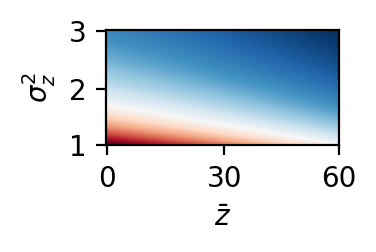

In [9]:
h = np.array([45.])

mean_range = np.linspace(0, 60, 99)
variance_range = np.linspace(1, 3, 49)
z_bar, var = np.meshgrid(dzdt_range, variance_range)

dzdt = 0
eta = 1e-3

z = activation(h-3*r0)+r0
der = derivative(h-3*r0)

plt.figure(figsize=(1.5,1.5), dpi=200)

dw = eta*h*der*(1/var*(z-z_bar)-dzdt)
plt.imshow(np.flipud(dw), cmap='RdBu_r')
plt.xlabel(r'$\bar{z}$')
plt.ylabel(r'$\sigma_z^2$')

ax=plt.gca()
ax.set_xticks([0, 50, 99])
ax.set_yticks([0, 25, 49])
ax.set_xticklabels([0, 30, 60])
ax.set_yticklabels([3, 2, 1])
# plt.colorbar()

### ReLU nonlinearity

In [10]:
def activation(h):
    z = np.zeros_like(h)
    z[h<0] = 0
    z[h>=0] = h[h>=0]
    return z

def derivative(h):
    der = np.zeros_like(h)
    
    der[h<0] = 0
    der[h>=0] = 1
    
    return der

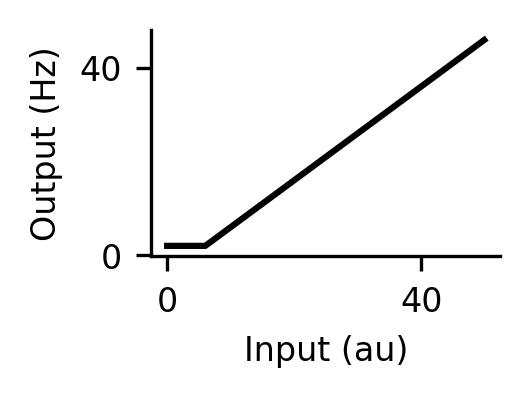

In [11]:
h = np.arange(0, 50, 0.1)
z = activation(h-3*r0)+r0

plt.figure(figsize=(1.5,1.0), dpi=300)
plt.plot(h, z, color='k')
plt.xlabel('Input (au)', fontsize=8)
plt.ylabel('Output (Hz)', fontsize=8)
plt.xticks([0, 40])
plt.yticks([0, 40])
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)

sns.despine()

plt.savefig(os.path.join(outputdir,'relu_activation.pdf'), bbox_inches='tight')

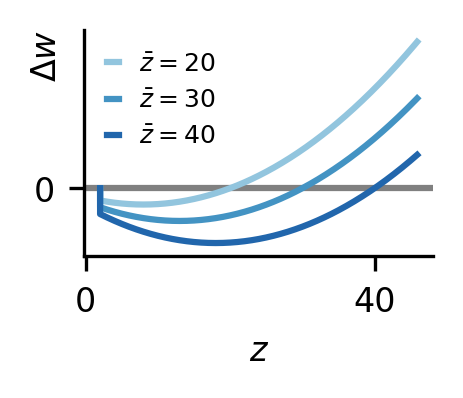

In [12]:
h = np.arange(0, 50, 0.1)
z_bars = [20, 30, 40]
var = 1
eta = 1e-3

z = activation(h-3*r0)+r0
der = derivative(h-3*r0)

plt.figure(figsize=(1.5,1.0), dpi=300)

for i, z_bar in enumerate(z_bars):
    plt.plot(z, eta*h*der*1/var*(z-z_bar), label=r'$\bar z={}$'.format(z_bar), color=colors[i])
    
plt.xlabel(r'$z$', fontsize=8)
plt.ylabel(r'$\Delta w$', fontsize=8, loc='top')
plt.axhline(0, color='gray', zorder=0)
plt.yticks([0])
plt.ylim(-0.6, 1.4)
plt.xticks([0, 40])
ax = plt.gca()
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.labelpad = -7
plt.legend(frameon=False, fontsize=6, handlelength=0.5)

sns.despine()

plt.savefig(os.path.join(outputdir,'relu_learning_rule_mean.pdf'), bbox_inches='tight')

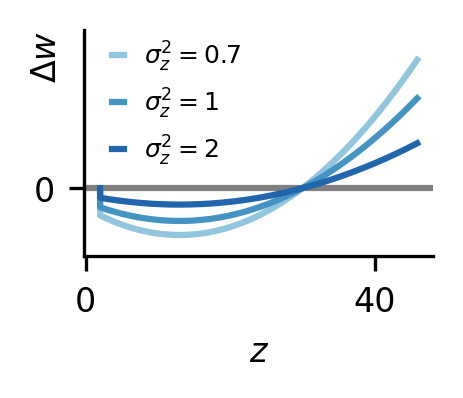

In [13]:
h = np.arange(0, 50, 0.1)
variances = [0.7, 1, 2]
z_bar = 30
eta = 1e-3

z = activation(h-3*r0)+r0
der = derivative(h-3*r0)

plt.figure(figsize=(1.5,1.0), dpi=300)

for i, var in enumerate(variances):
    plt.plot(z, eta*h*der*1/var*(z-z_bar), label=r'$\sigma_z^2={}$'.format(var), color=colors[i])
    
plt.xlabel(r'$z$', fontsize=8)
plt.ylabel(r'$\Delta w$', fontsize=8, loc='top')
plt.axhline(0, color='gray', zorder=0)
plt.yticks([0])
plt.ylim(-0.6, 1.4)
plt.xticks([0, 40])
ax = plt.gca()
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.labelpad = -7
plt.legend(frameon=False, fontsize=6, handlelength=0.5, loc=(0.05, 0.35))

sns.despine()

plt.savefig(os.path.join(outputdir,'relu_learning_rule_var.pdf'), bbox_inches='tight')

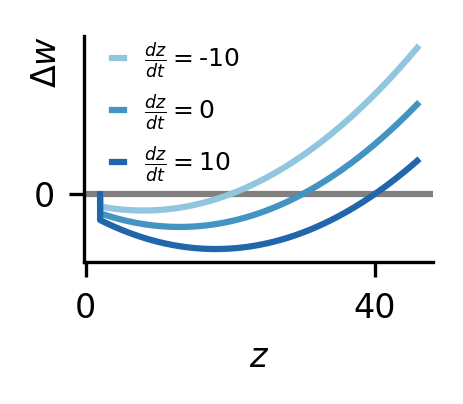

In [14]:
h = np.arange(0, 50, 0.1)
dzdts = [-10, 0, 10]
var = 1
z_bar = 30
eta = 1e-3

z = activation(h-3*r0)+r0
der = derivative(h-3*r0)

plt.figure(figsize=(1.5,1.0), dpi=300)

for i, dzdt in enumerate(dzdts):
    plt.plot(z, eta*h*der*(1/var*(z-z_bar)-dzdt), label=r'$\frac{dz}{dt}=$'+ str(dzdt), color=colors[i])
    
plt.xlabel(r'$z$', fontsize=8)
plt.ylabel(r'$\Delta w$', fontsize=8, loc='top')
plt.axhline(0, color='gray', zorder=0)
plt.yticks([0])
plt.ylim(-0.6, 1.4)
plt.xticks([0, 40])
ax = plt.gca()
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
ax.yaxis.labelpad = -7
plt.legend(frameon=False, fontsize=6, handlelength=0.5, loc=(0.05, 0.3))

sns.despine()

plt.savefig(os.path.join(outputdir,'relu_learning_rule_rate.pdf'), bbox_inches='tight')

## Loss function relative amplitudes under different forms of the Hebbian objective

This section visualizes how different forms of the variance-maximising objective interact with the predictive objective, and how the total objective scales with average output activity levels showing why it's important to suppress Hebbian learning at high variance levels.

In [15]:
outputdir = os.path.expanduser("~/data/plots_of_the_day/lpl/suppl_fig_losses")
os.makedirs(outputdir, exist_ok=True)

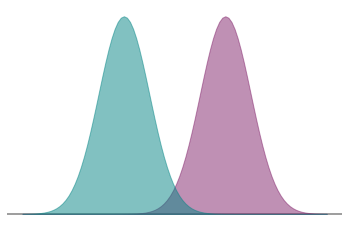

In [16]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(-6, 6, 100)
dist1 = gaussian(x, 2, 1)
dist2 = gaussian(x, -2, 1)

plt.fill_between(x, dist1, alpha=0.5, color='#81226A')
plt.fill_between(x, dist2, alpha=0.5, color='#058585')
plt.axis('off')
plt.axhline(0, color='gray', zorder=0)
plt.savefig(os.path.join(outputdir,'losses_distribution.pdf'), bbox_inches='tight', backend='pgf')

In [17]:
d = np.linspace(1e-3,10)

Lpred = d**2/8
variance = d**2*(1.0/4 + 1.0/16)
Lvar = -variance
Llogvar = -np.log(variance)
Lbardes = 1-np.sqrt(variance)
Lbardes[Lbardes<0] = 0
Lsfa = 1-variance

In [18]:
# colors = ['#1b9e77', '#d95f02', '#7570b3']
# colors = ['#0077BB', '#EE7733', '#CC3311']
# colors = ['#4477AA', '#228833', '#EE6677']
colors = ['#8da0cb', '#fc8d62', '#66c2a5']

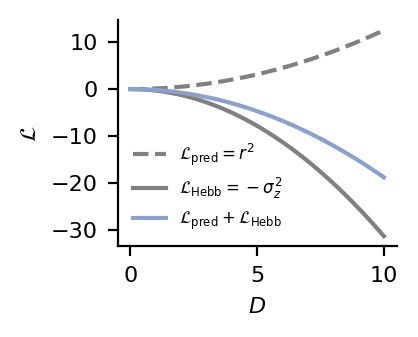

In [19]:
plt.figure(figsize=(1.8,1.5), dpi=200)
plt.plot(d, Lpred, label=r'$\mathcal{L}_\mathrm{pred}=r^2$', color='gray', linestyle='--')
plt.plot(d, Lvar, label=r'$\mathcal{L}_\mathrm{Hebb}=-\sigma_z^2$', color='gray')
plt.plot(d, Lpred+Lvar, label=r'$\mathcal{L}_\mathrm{pred} + \mathcal{L}_\mathrm{Hebb}$', color=colors[0])
# plt.axhline(0, color='gray', zorder=0)
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))

plt.xlabel(r'$D$', fontsize=8)
plt.ylabel(r'$\mathcal{L}$', fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
plt.legend(fontsize=6,frameon=False)
sns.despine()

plt.savefig(os.path.join(outputdir,'losses_variance.pdf'), bbox_inches='tight')

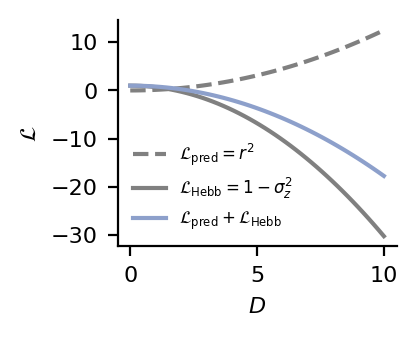

In [20]:
plt.figure(figsize=(1.8,1.5), dpi=200)
plt.plot(d, Lpred, label=r'$\mathcal{L}_\mathrm{pred}=r^2$', color='gray', linestyle='--')
plt.plot(d, Lsfa, label=r'$\mathcal{L}_\mathrm{Hebb}=1-\sigma_z^2$', color='gray')
plt.plot(d, Lpred+Lsfa, label=r'$\mathcal{L}_\mathrm{pred} + \mathcal{L}_\mathrm{Hebb}$', color=colors[0])
# plt.axhline(0, color='gray', zorder=0)
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))

plt.xlabel(r'$D$', fontsize=8)
plt.ylabel(r'$\mathcal{L}$', fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
plt.legend(fontsize=6,frameon=False)
sns.despine()

# plt.savefig('losses_variance.pdf', bbox_inches='tight')

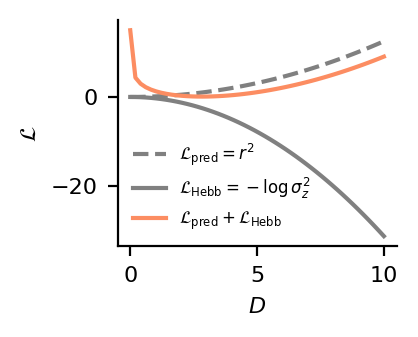

In [21]:
plt.figure(figsize=(1.8,1.5), dpi=200)
plt.plot(d, Lpred, label=r'$\mathcal{L}_\mathrm{pred}=r^2$', color='gray', linestyle='--')
plt.plot(d, Lvar, label=r'$\mathcal{L}_\mathrm{Hebb}=-\log\sigma_z^2$', color='gray')
plt.plot(d, Lpred+Llogvar, label=r'$\mathcal{L}_\mathrm{pred} + \mathcal{L}_\mathrm{Hebb}$', color=colors[1])
# plt.axhline(0, color='gray', zorder=0)
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))

plt.xlabel(r'$D$', fontsize=8)
plt.ylabel(r'$\mathcal{L}$', fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%5d'))
plt.legend(fontsize=6,frameon=False)
sns.despine()

plt.savefig(os.path.join(outputdir,'losses_logvariance.pdf'), bbox_inches='tight')

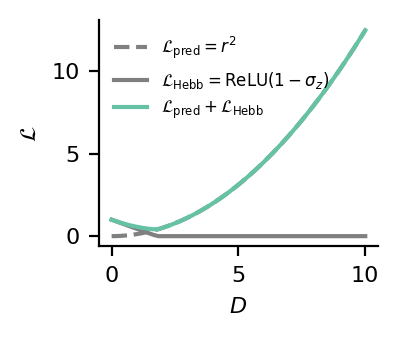

In [22]:
plt.figure(figsize=(1.8,1.5), dpi=200)
plt.plot(d, Lpred, label=r'$\mathcal{L}_\mathrm{pred}=r^2$', color='gray', linestyle='--')
plt.plot(d, Lbardes, label=r'$\mathcal{L}_\mathrm{Hebb}=\mathrm{ReLU}(1-\sigma_z)$', color='gray')
plt.plot(d, Lpred+Lbardes, label=r'$\mathcal{L}_\mathrm{pred} + \mathcal{L}_\mathrm{Hebb}$', color=colors[2])
# plt.axhline(0, color='gray', zorder=0)
# ax.spines['left'].set_position(('data', 0))
# ax.spines['bottom'].set_position(('data', 0))

plt.xlabel(r'$D$', fontsize=8)
plt.ylabel(r'$\mathcal{L}$', fontsize=8)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize=8)
plt.legend(fontsize=6,frameon=False)
sns.despine()

plt.savefig(os.path.join(outputdir,'losses_vic.pdf'), bbox_inches='tight')